# Research Question 1 - Order-Invariant Assumption

In [1]:
import pickle

with open("data/human.pkl", "rb") as human, open("data/comet.pkl", "rb") as comet:
    experiments = pickle.load(human) + pickle.load(comet)

print(f"Total number of experiments: {len(experiments)}")

Total number of experiments: 23


In [2]:
def float32_precision_test(observations):
    observations = observations.apply(lambda x: float(format(x, ".7g")))
    
    return observations.nunique() == 1

def float32_aggrement_test(observations):
    for digit in range(7, -1, -1):
        if observations.apply(lambda x: float(format(x, f".{digit}g"))).nunique() == 1:
            return digit

## Analysis on Prediction

In [3]:
import pandas as pd

HUMAN_NEEDS = ("status", "approval", "tranquility", "competition", "health", "family", "romance", "food",
               "independence","power", "order", "curiosity", "serenity", "honor", "belonging", "contact",
               "savings", "idealism", "rest")

predictions = pd.DataFrame(
    ((e.story, e.sentence, e.character, i.human_size, i.machine_size, need, value)
     for e in experiments for i in e.instances for s in i.samples
     for need, value in zip(HUMAN_NEEDS, s.result)),
    columns=("story", "line", "character", "human_size", "machine_size", "need", "value")
)

predictions

,story,line,character,human_size,machine_size,need,value
0,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,0,status,0.469050
1,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,0,approval,0.419768
2,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,0,tranquility,0.340969
3,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,0,competition,0.435739
4,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,0,health,0.312782
...,...,...,...,...,...,...,...
11232795,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,belonging,0.000335
11232796,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,contact,0.067039
11232797,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,savings,0.113374
11232798,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,idealism,0.189569


In [4]:
predictions = predictions.groupby(["story", "line", "character"])\
    .apply(lambda x: x[(x.human_size == 0) & (x.machine_size == x.machine_size.max())])\
    .reset_index(drop=True)[["story", "line", "character", "need", "value"]]

predictions

,story,line,character,need,value
0,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,status,0.481567
1,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,approval,0.310710
2,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,tranquility,0.039941
3,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,competition,0.401482
4,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,health,0.035084
...,...,...,...,...,...
43695,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,belonging,0.000014
43696,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,contact,0.288310
43697,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,savings,0.093079
43698,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,idealism,0.405672


### Float 32 Test

In [5]:
predictions.groupby(["story", "line", "character", "need"]).value\
    .apply(float32_precision_test)\
    .to_frame("expected")\
    .pivot_table("expected", ["story", "line", "character"], "need")

need                                                    approval  belonging  \
story                                line character                           
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina              True      False   
0463f79e-2d83-44b7-ad1f-5bcb3f5fd947 3    Finn             False      False   
                                     4    Finn              True      False   
047a5159-6595-4ec2-b7e6-2807b5f0fc78 1    Gary              True      False   
                                     2    Gary              True      False   
05c4681d-f365-438b-8509-58461afb2935 5    A small boy      False      False   
061a896e-12bb-4f3a-a8ec-7e4188228ac9 5    I (myself)        True      False   
171c3ca6-1515-4853-b252-998066f3ceb6 1    Meredith         False      False   
                                     2    Meredith          True       True   
                                     3    Meredith          True       True   
                                     5    Meredith          True      False   
1de18db6-1956-4ea4-8cba-d3147783c6dc 3    Girls             True      False   
                                          Neighborhood     False      False   
                                          Rick             False      False   
5a49eb64-7560-4d40-a9c6-9f5ea7dce513 4    Valerie          False      False   
7a45afb8-18c4-4397-8751-6d8332d88178 1    Tycho            False      False   
                                     3    Tycho             True      False   
                                     4    Doctor           False      False   
                                          Tycho            False      False   
                                     5    Tycho            False      False   
a3e66276-ef27-426f-8a2f-329779f17038 1    Cook             False      False   
                                     5    Cook              True      False   
b33a2445-7421-4ace-9837-e8f165524ccf 3    Riley            False      False   

need                                                    competition  contact  \
story                                line character                            
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina                 True     True   
0463f79e-2d83-44b7-ad1f-5bcb3f5fd947 3    Finn                 True    False   
                                     4    Finn                False    False   
047a5159-6595-4ec2-b7e6-2807b5f0fc78 1    Gary                False    False   
                                     2    Gary                False    False   
05c4681d-f365-438b-8509-58461afb2935 5    A small boy         False    False   
061a896e-12bb-4f3a-a8ec-7e4188228ac9 5    I (myself)          False     True   
171c3ca6-1515-4853-b252-998066f3ceb6 1    Meredith            False    False   
                                     2    Meredith             True     True   
                                     3    Meredith             True     True   
                                     5    Meredith             True     True   
1de18db6-1956-4ea4-8cba-d3147783c6dc 3    Girls                True    False   
                                          Neighborhood        False    False   
                                          Rick                 True     True   
5a49eb64-7560-4d40-a9c6-9f5ea7dce513 4    Valerie             False     True   
7a45afb8-18c4-4397-8751-6d8332d88178 1    Tycho                True     True   
                                     3    Tycho                True    False   
                                     4    Doctor              False    False   
                                          Tycho               False    False   
                                     5    Tycho               False    False   
a3e66276-ef27-426f-8a2f-329779f17038 1    Cook                 True     True   
                                     5    Cook                False    False   
b33a2445-7421-4ace-9837-e8f165524ccf 3    Riley                True    False   

need                   

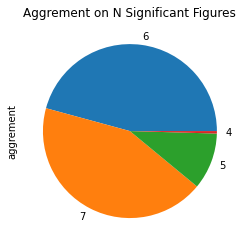

In [6]:
predictions.groupby(["story", "line", "character", "need"]).value\
    .apply(float32_aggrement_test)\
    .rename("aggrement")\
    .value_counts()\
    .plot(kind="pie", title="Aggrement on N Significant Figures")

## Analysis on Attention

In [7]:
import itertools

attentions = pd.DataFrame(
    ((e.story, e.sentence, e.character, i.human_size, i.machine_size, p.content, p.index, p.weight)
     for e in experiments for i in e.instances for s in i.samples
     for p in itertools.chain(s.human_paths, s.machine_paths)),
    columns=("story", "line", "character", "human_size", "machine_size", "path", "index", "value")
)

attentions

,story,line,character,human_size,machine_size,path,index,value
0,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,idealism related to realism related to indepen...,0,1.000000e+00
1,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,grateful related to pleasing related to cheer ...,0,1.000000e+00
2,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,safety is a condition related to fair related ...,0,1.000000e+00
3,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,ugly related to unattractive related to power,0,1.000000e+00
4,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,0,1,grateful related to gratitude related to grace...,0,1.000000e+00
...,...,...,...,...,...,...,...,...
19615595,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,curiosity causes desire read related to magazi...,64,1.541623e-19
19615596,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,family is a people has a eat,65,4.477521e-20
19615597,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,order Synonym degree related to doctorate deri...,66,1.466785e-19
19615598,7a45afb8-18c4-4397-8751-6d8332d88178,5,Tycho,3,66,calm related to still Etymologicallyrelated to...,67,3.290065e-19


In [8]:
attentions = attentions.groupby(["story", "line", "character"])\
    .apply(lambda x: x[(x.human_size == 0) & (x.machine_size == x.machine_size.max())])\
    .reset_index(drop=True)[["story", "line", "character", "path", "index", "value"]]

attentions

,story,line,character,path,index,value
0,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,love causes desire paint related to ugly,0,5.907698e-15
1,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,status related to position related to stand re...,1,1.699289e-16
2,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,pretend HasSubevent fun has property free rela...,2,2.290936e-10
3,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,leftover is a remainder related to possession ...,3,3.979581e-02
4,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,grateful related to gratitude related to grace...,4,9.867313e-16
...,...,...,...,...,...,...
145495,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,status has context medicine related to take An...,56,1.076834e-08
145496,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,good related to well related to health,57,1.405424e-08
145497,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,drop manner of fall related to power,58,4.210287e-03
145498,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,class related to order,59,1.464978e-02


### Float 32 Test

In [9]:
attentions.groupby(["story", "line", "character", "path"]).value\
    .apply(float32_precision_test)\
    .to_frame("expected")

expected
story                                line character path                                                        
0428b530-0cec-4955-b023-0bac60ddf8cc 5    Gina      approval related to ok Antonym ill Synonym ugly        False
                                                    approval similar to acclamation has context art...      True
                                                    belonging Synonym possession at location house ...      True
                                                    belonging related to family related to children...      True
                                                    calm Antonym anger Etymologicallyrelated to ugly        True
...                                                                                                          ...
b33a2445-7421-4ace-9837-e8f165524ccf 3    Riley     rest related to final related to class                 False
                                                    safety Synonym guard related to correction is a...      True
                                                    safety related to pin Synonym fall related to drop      True
                                                    social related to party Antonym solo related to...      True
                                                    status has context medicine related to take Ant...     False

[1455 rows x 1 columns]

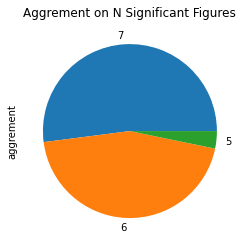

In [10]:
attentions.groupby(["story", "line", "character", "path"]).value\
    .apply(float32_aggrement_test)\
    .rename("aggrement")\
    .value_counts()\
    .plot(kind="pie", title="Aggrement on N Significant Figures")